In [1]:
import pandas as pd


output_file_path = "data/config/extracted_config_with_comments_and_ids.xlsx"

df = pd.read_excel(output_file_path)
df

,#,Ticket,Updated date,Country Applied,Module,Function,"Type (API, DB, Cron,Config","Type Name (API name, Cron name, Config name , DB table name > field name,...)",Note for Type Name,Status (Active/Inactive),System,Comment,unique_id,Country Applied Full Name
0,1,GR-3924,NaN,TH,RO,NaN,Config,Hide Option AC PTO Product,Scope: Website\nConfig > LG Global > Cart conf...,NaN,GP1,NaN,0,Thailand Store View
1,2,GR-3785,NaN,TH,RO,NaN,Config,Limit Purchase Message Error,Scope: Website\nStore -> configuration -> lg_g...,NaN,GP1,NaN,1,Thailand Store View
2,3,GR-3577,NaN,Country có Multiple storeview,RO,NaN,Config,enable format sku,Scope: Website\nStore–> configuration–> Lgcore...,NaN,GP1,NaN,2,countrycómultiplestoreview
3,4,GR-3463,NaN,CA,RO,NaN,Config,Enable Tax Before Postal Code,Scope: Website\nThêm setting Enable Tax Before...,NaN,GP1,NaN,3,Canada
4,5,GR-3861,NaN,SA,RO,NaN,Config,Auto Create Shipment for NLG Product,Scope: Website\nStore > Configuration > Scope:...,NaN,GP1,NaN,4,Saudi Arabia Store Arabic View
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,NEW (update from 01/10/2024),GR-11100,17/10/2024,CH_DE,RO,LittleBit Integratio,Config,Store > Configuration >LG Region >Little Bit >...,Store > Configuration >LG Region >Little Bit >...,Active,GP1,NaN,1076,Switzerland Germany Default Store View
1037,NEW (update from 01/10/2024),GR-11361,2024-01-11 00:00:00,HU,RO,Heureka,API,API: adsProducts,"Thêm param ""oms_product_id"" vào API adsProducts",Active,GP1,NaN,1077,Hungary Default Store View
1038,NEW (update from 01/10/2024),GR-11533,2024-07-11 00:00:00,CH,RO,Maximum delivery date range,Config,Stores > Configuration > LG Region > LG Switze...,Thêm config này thì list order sẽ hiển thị = l...,Active,GP1,NaN,1078,ch
1039,NEW (update from 01/10/2024),GR-11515,15/11/2024,IT/CH,RO,Allow Credit Memo with multiple Returns,Config,Stores > Configuration > Sales > Sales > Italy...,"When config is enabled, allow admin to create ...",Active,GP1,NaN,1079,Italy Default Store View / ch


In [2]:
df.drop(columns=["#"], inplace=True)
df.fillna("", inplace=True)
df.head()

,Ticket,Updated date,Country Applied,Module,Function,"Type (API, DB, Cron,Config","Type Name (API name, Cron name, Config name , DB table name > field name,...)",Note for Type Name,Status (Active/Inactive),System,Comment,unique_id,Country Applied Full Name
0,GR-3924,,TH,RO,,Config,Hide Option AC PTO Product,Scope: Website\nConfig > LG Global > Cart conf...,,GP1,,0,Thailand Store View
1,GR-3785,,TH,RO,,Config,Limit Purchase Message Error,Scope: Website\nStore -> configuration -> lg_g...,,GP1,,1,Thailand Store View
2,GR-3577,,Country có Multiple storeview,RO,,Config,enable format sku,Scope: Website\nStore–> configuration–> Lgcore...,,GP1,,2,countrycómultiplestoreview
3,GR-3463,,CA,RO,,Config,Enable Tax Before Postal Code,Scope: Website\nThêm setting Enable Tax Before...,,GP1,,3,Canada
4,GR-3861,,SA,RO,,Config,Auto Create Shipment for NLG Product,Scope: Website\nStore > Configuration > Scope:...,,GP1,,4,Saudi Arabia Store Arabic View


In [3]:
# Convert every column to string
df = df.applymap(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 13 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Ticket                                                                         1041 non-null   object
 1   Updated date                                                                   1041 non-null   object
 2   Country Applied                                                                1041 non-null   object
 3   Module                                                                         1041 non-null   object
 4   Function                                                                       1041 non-null   object
 5   Type (API, DB, Cron,Config                                                     1041 non-null   object
 6   Type Name (API name, Cron name, 

/tmp/ipykernel_1054/960348591.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(str)


In [4]:
df["text_col"] = (df['Country Applied Full Name'].astype(str) + " (" + df['Country Applied'].astype(str) + ") " 
                    + df['Function'].astype(str) + " " 
                    + df["Type (API, DB, Cron,Config"].astype(str) + " " 
                    + df["Type Name (API name, Cron name, Config name , DB table name > field name,...)"].astype(str) + " "
                    + "System: " + df["System"].astype(str))
df.head()

,Ticket,Updated date,Country Applied,Module,Function,"Type (API, DB, Cron,Config","Type Name (API name, Cron name, Config name , DB table name > field name,...)",Note for Type Name,Status (Active/Inactive),System,Comment,unique_id,Country Applied Full Name,text_col
0,GR-3924,,TH,RO,,Config,Hide Option AC PTO Product,Scope: Website\nConfig > LG Global > Cart conf...,,GP1,,0,Thailand Store View,Thailand Store View (TH) Config Hide Option A...
1,GR-3785,,TH,RO,,Config,Limit Purchase Message Error,Scope: Website\nStore -> configuration -> lg_g...,,GP1,,1,Thailand Store View,Thailand Store View (TH) Config Limit Purchas...
2,GR-3577,,Country có Multiple storeview,RO,,Config,enable format sku,Scope: Website\nStore–> configuration–> Lgcore...,,GP1,,2,countrycómultiplestoreview,countrycómultiplestoreview (Country có Multipl...
3,GR-3463,,CA,RO,,Config,Enable Tax Before Postal Code,Scope: Website\nThêm setting Enable Tax Before...,,GP1,,3,Canada,Canada (CA) Config Enable Tax Before Postal C...
4,GR-3861,,SA,RO,,Config,Auto Create Shipment for NLG Product,Scope: Website\nStore > Configuration > Scope:...,,GP1,,4,Saudi Arabia Store Arabic View,Saudi Arabia Store Arabic View (SA) Config Au...


In [5]:
df.drop(columns=["Country Applied Full Name"], inplace=True)

In [5]:
df["System"].unique()

array(['GP1', '', 'Both', 'Current GP'], dtype=object)

In [6]:
df[['text_col']].head(20)

# Expand column width to see the full text
with pd.option_context('display.max_colwidth', 100):
    print(df[['text_col']].head(40))

                                                                                               text_col
0                               Thailand Store View (TH)  Config Hide Option AC PTO Product System: GP1
1                             Thailand Store View (TH)  Config Limit Purchase Message Error System: GP1
2      countrycómultiplestoreview (Country có Multiple storeview)  Config enable format sku System: GP1
3                                         Canada (CA)  Config Enable Tax Before Postal Code System: GP1
4          Saudi Arabia Store Arabic View (SA)  Config Auto Create Shipment for NLG Product System: GP1
5                                   Thailand Store View (TH)  Config Message invalid coupon System: GP1
6                     Thailand Store View (TH)  Config Sync PTO Child Ready Checkout Status System: GP1
7                                               Canada (CA)  Config RMA Change Title Status System: GP1
8                          Japan Default Store View (JP)  Config

[Document(metadata={'Ticket': 'GR-3924', 'Updated date': '', 'Country Applied': 'TH', 'Module': 'RO', 'Function': '', 'Type (API, DB, Cron,Config': 'Config', 'Type Name (API name, Cron name, Config name , DB table name > field name,...)': 'Hide Option AC PTO Product', 'Note for Type Name': 'Scope: Website\nConfig > LG Global > Cart config > Cart Item > Hide Option AC PTO Product', 'Status (Active/Inactive)': '', 'System': 'GP1', 'Comment': '', 'unique_id': '0'}, page_content='Thailand Store View (TH)  Config Hide Option AC PTO Product System: GP1'),
 Document(metadata={'Ticket': 'GR-3785', 'Updated date': '', 'Country Applied': 'TH', 'Module': 'RO', 'Function': '', 'Type (API, DB, Cron,Config': 'Config', 'Type Name (API name, Cron name, Config name , DB table name > field name,...)': 'Limit Purchase Message Error', 'Note for Type Name': 'Scope: Website\nStore -> configuration -> lg_global -> limit purchase -> Limit Purchase Message Error', 'Status (Active/Inactive)': '', 'System': 'GP1
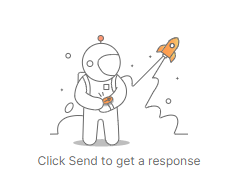

In [7]:
from langchain_community.document_loaders import DataFrameLoader

loader = DataFrameLoader(df, page_content_column="text_col")
docs = loader.load()
docs

# Test QDrant

In [8]:
from components.search_info.search_info import QdrantSetup
import pandas as pd 

# df = pd.read_excel("./data/config/extracted_config_with_comments_and_ids.xlsx")
qdrant_setup = QdrantSetup()


/home/khangnh/miniconda3/envs/itm-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/khangnh/miniconda3/envs/itm-env/lib/python3.10/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/khangnh/SmartOSC_Project/Projects/ait_chatbot/components/search_info/search_info.py:17: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` a

In [ ]:
# qdrant_setup.create_db(collection_name="config_api_collection", documents=docs)

In [12]:
docs = qdrant_setup.hybrid_search("Làm sao để show được value Disclaimer Text For Item", collection_name="config_api_collection")
docs

RuntimeError: Storage folder vectorDB is already accessed by another instance of Qdrant client. If you require concurrent access, use Qdrant server instead.

In [4]:
d[1]

0.25

In [3]:
for d in docs:
    print(d[0].metadata)
    print(d[0].page_content)

{'Ticket': 'GR-3463', 'Updated date': '', 'Country Applied': 'CA', 'Module': 'RO', 'Function': '', 'Type (API, DB, Cron,Config': 'Config', 'Type Name (API name, Cron name, Config name , DB table name > field name,...)': 'Enable Tax Before Postal Code', 'Note for Type Name': 'Scope: Website\nThêm setting Enable Tax Before Postal Code ở Store Config -> Scope Website -> Sales -> Tax. Đối với country có setting \n     Enable Tax Before Postal Code = No\n    \n thì k tính thuế và ehf nữa', 'Status (Active/Inactive)': '', 'System': 'GP1', 'Comment': '', 'unique_id': '3', '_id': '0b97416284494ea19c7f0970fd82e5c0', '_collection_name': 'test_collection'}
CA  Config Enable Tax Before Postal Code System: GP1
{'Ticket': 'GR-3785', 'Updated date': '', 'Country Applied': 'TH', 'Module': 'RO', 'Function': '', 'Type (API, DB, Cron,Config': 'Config', 'Type Name (API name, Cron name, Config name , DB table name > field name,...)': 'Limit Purchase Message Error', 'Note for Type Name': 'Scope: Website\nSt